In [151]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
data = pd.read_csv('D:/projects/min temp time-series/temp.csv',header=0,squeeze=True)

# EDA


In [153]:
data.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [154]:
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [155]:
data = data.rename(columns = {'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'Temperature'})

In [156]:
data['Temperature'] = data['Temperature'].astype("float64")

In [157]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


# Data Visualization

In [158]:
import seaborn as sns

<ipython-input-159-bf35cdc04b24>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(data.Temperature,model='additive',extrapolate_trend='freq',freq=365)


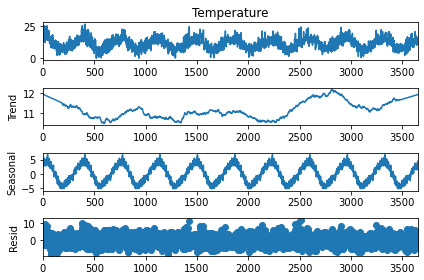

In [159]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.Temperature,model='additive',extrapolate_trend='freq',freq=365)
result.plot()
plt.show()

In [160]:
avg_temp = data.Temperature.mean()

In [161]:
data1 = data.copy()

In [162]:
data1['avg_temp'] = avg_temp

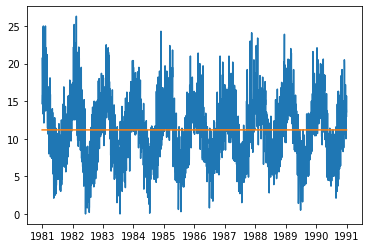

In [163]:
plt.plot(data['Date'],data['Temperature'])
plt.plot(data['Date'],data1['avg_temp'])

In [164]:
series = pd.read_csv('D:/projects/min temp time-series/temp.csv',header=0,squeeze=True,index_col=0,parse_dates=True)

In [165]:
series.head()

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

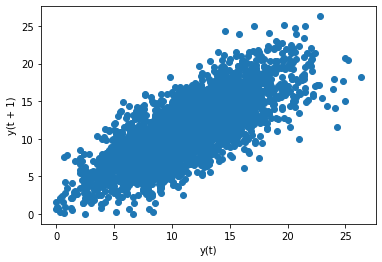

In [166]:
pd.plotting.lag_plot(series)

In [167]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

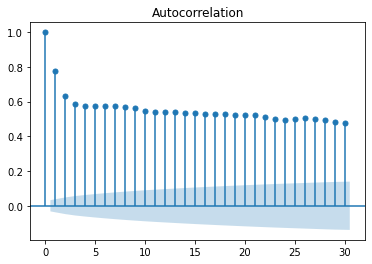

In [168]:
plot_acf(series,lags=30)
plt.show()

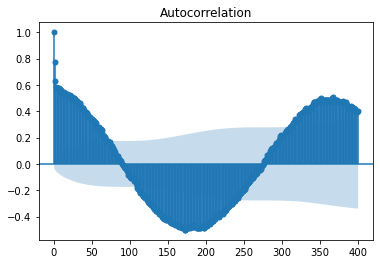

In [169]:
plot_acf(series,lags=400)
plt.show()

In [ ]:
values = series.values
train,test = values[0:len(values)-7],values[len(values)-7:]

In [208]:
train

array([20.7, 17.9, 18.8, ..., 13.2, 13.9, 10. ])

# Baseline model

In [170]:
#shift the current temperature to the next day
pred_temp = data['Temperature'].to_frame().shift(1).rename(columns={'Temperature':'predicted_Temperature'})
actual_temp = data['Temperature'].to_frame().rename(columns={'Temperature': 'Actual_Temperature'})
one_step_model = pd.concat([pred_temp,actual_temp],axis=1)
one_step_model= one_step_model[1:]
one_step_model.head()

,predicted_Temperature,Actual_Temperature
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8
5,15.8,15.8


In [171]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

In [172]:
baseline_error = sqrt(MSE(one_step_model.Actual_Temperature,one_step_model.predicted_Temperature))
print("THE RMSE ERROR FOR THE BASELINE MODEL IS" ,baseline_error)

THE RMSE ERROR FOR THE BASELINE MODEL IS 2.731199217222091


# AR MODEL

In [177]:
error = []
lags = []
for k in range(1,31):
    model1 = AutoReg(train,lags=k)
    model1_fit=model1.fit()
    pred = model1_fit.predict(start = len(train), end = len(train)+len(test)-1,dynamic=False)
    rmse = np.sqrt(mean_squared_error(test,pred))
    print("for lags = %f, Root Mean Squared Error: %0.3f"%(k,rmse))
    error.append(rmse)
    lags.append(k)


   




for lags = 1.000000, Root Mean Squared Error: 3.334
for lags = 2.000000, Root Mean Squared Error: 3.240
for lags = 3.000000, Root Mean Squared Error: 2.977
for lags = 4.000000, Root Mean Squared Error: 2.763
for lags = 5.000000, Root Mean Squared Error: 2.468
for lags = 6.000000, Root Mean Squared Error: 2.227
for lags = 7.000000, Root Mean Squared Error: 1.868
for lags = 8.000000, Root Mean Squared Error: 1.726
for lags = 9.000000, Root Mean Squared Error: 1.620
for lags = 10.000000, Root Mean Squared Error: 1.564
for lags = 11.000000, Root Mean Squared Error: 1.531
for lags = 12.000000, Root Mean Squared Error: 1.530
for lags = 13.000000, Root Mean Squared Error: 1.545


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use t

for lags = 14.000000, Root Mean Squared Error: 1.575
for lags = 15.000000, Root Mean Squared Error: 1.640
for lags = 16.000000, Root Mean Squared Error: 1.651
for lags = 17.000000, Root Mean Squared Error: 1.627
for lags = 18.000000, Root Mean Squared Error: 1.526
for lags = 19.000000, Root Mean Squared Error: 1.485
for lags = 20.000000, Root Mean Squared Error: 1.328
for lags = 21.000000, Root Mean Squared Error: 1.237
for lags = 22.000000, Root Mean Squared Error: 1.203
for lags = 23.000000, Root Mean Squared Error: 1.230
for lags = 24.000000, Root Mean Squared Error: 1.205
for lags = 25.000000, Root Mean Squared Error: 1.194
for lags = 26.000000, Root Mean Squared Error: 1.208
for lags = 27.000000, Root Mean Squared Error: 1.214
for lags = 28.000000, Root Mean Squared Error: 1.227
for lags = 29.000000, Root Mean Squared Error: 1.225
for lags = 30.000000, Root Mean Squared Error: 1.225


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use t

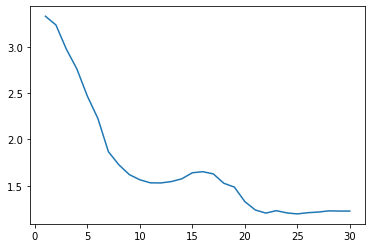

In [178]:
plt.plot(lags,error)

In [179]:
model2 = AutoReg(train,lags=14)
model2_fit=model2.fit()
pred1 = model2_fit.predict(start = len(train), end = len(train)+len(test)-1,dynamic=False)
rmse = np.sqrt(mean_squared_error(test,pred1))
print("for lags = %f, Root Mean Squared Error: %0.3f"%(14,rmse))
for i in range (len(pred1)):
    print('Predicted temperature =%f, Expected Temperature=%f' %(pred1[i],test[i]))

for lags = 14.000000, Root Mean Squared Error: 1.575
Predicted temperature =11.333390, Expected Temperature=12.900000
Predicted temperature =12.469958, Expected Temperature=14.600000
Predicted temperature =12.879503, Expected Temperature=14.000000
Predicted temperature =12.857908, Expected Temperature=13.600000
Predicted temperature =12.842412, Expected Temperature=13.500000
Predicted temperature =12.854446, Expected Temperature=15.700000
Predicted temperature =12.829843, Expected Temperature=13.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


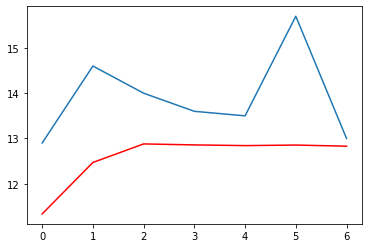

In [180]:
plt.plot(test)
plt.plot(pred1,color='red')
plt.show()

In [181]:
model3 = AutoReg(train,lags=29)
model3_fit=model3.fit()
pred2 = model3_fit.predict(start = len(train), end = len(train)+len(test)-1,dynamic=False)
rmse = np.sqrt(mean_squared_error(test,pred2))
print("for lags = %f, Root Mean Squared Error: %0.3f"%(29,rmse))
for i in range (len(pred2)):
    print('Predicted temperature =%f, Expected Temperature=%f' %(pred2[i],test[i]))

for lags = 29.000000, Root Mean Squared Error: 1.225
Predicted temperature =11.872160, Expected Temperature=12.900000
Predicted temperature =13.055704, Expected Temperature=14.600000
Predicted temperature =13.531810, Expected Temperature=14.000000
Predicted temperature =13.242590, Expected Temperature=13.600000
Predicted temperature =13.091564, Expected Temperature=13.500000
Predicted temperature =13.146082, Expected Temperature=15.700000
Predicted temperature =13.176492, Expected Temperature=13.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


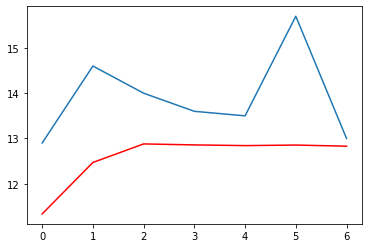

In [182]:
plt.plot(test)
plt.plot(pred1,color='red')
plt.show()

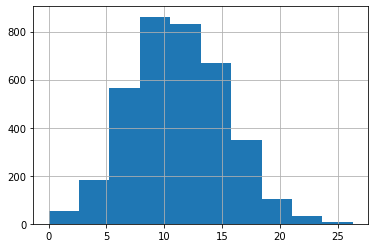

In [183]:
series.hist()
plt.show()

In [184]:
split=round(len(values)/2)

In [185]:
split

1825

In [186]:
x1,x2 = values[0:split],values[split:]

In [187]:
x1.shape,x2.shape

((1825,), (1825,))

In [188]:
x2

array([12.9, 13.8, 10.6, ..., 13.5, 15.7, 13. ])

In [189]:
x1_mean, x2_mean = x1.mean(),x2.mean()
x1_var,x2_var = x1.var(),x2.var()
print(x1_mean,x2_mean)
print(x1_var,x2_var)

11.043506849315069 11.312000000000001
18.160824962281854 14.953757369863014


In [190]:
from statsmodels.tsa.stattools import adfuller

In [191]:
stat = adfuller(values)
stat

(-4.444804924611689,
 0.0002470826300361109,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [192]:
print("ADF Statistics = %f" %stat[0])
print(" P-Value of Augumented Dickey-Fuller Test=%f" %stat[1])
print("Critical Values")
for key,value in stat[4].items():
    print('{} = {}'.format(key, value))

ADF Statistics = -4.444805
 P-Value of Augumented Dickey-Fuller Test=0.000247
Critical Values
1% = -3.4321532327220154
5% = -2.862336767636517
10% = -2.56719413172842


In [193]:
if(stat[1]<0.05):
    print("OUR TIME SERIES IS STATIONARY")

OUR TIME SERIES IS STATIONARY


# SARIMA MODEL

In [194]:
import itertools
import statsmodels.api as sm

#define the p,d,q parameters to take any value between 0 to 2
p=d=q=range(0,2)

#generate different combination of p,d,q triplets
pdq = list(itertools.product(p,d,q))

#generate all different combination of seasonal p,d,q triplets
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]


In [216]:
#parameter selection using Grid Search

for para in pdq:
    for para_seasonal in seasonal_pdq:
        
            mode = sm.tsa.statespace.SARIMAX(one_step_model.Actual_Temperature, order=para,seasonal_order=para_seasonal)
            results=mode.fit()
            
            print("SARIMA {}x{}12- AIC:{}".format(para,para_seasonal,results.aic))
        

SARIMA (0, 0, 0)x(0, 0, 0, 12)12- AIC:28426.777568878115
SARIMA (0, 0, 0)x(0, 0, 1, 12)12- AIC:25324.484666522076
SARIMA (0, 0, 0)x(0, 1, 0, 12)12- AIC:20202.59558754533
SARIMA (0, 0, 0)x(0, 1, 1, 12)12- AIC:19140.784578308252
SARIMA (0, 0, 0)x(1, 0, 0, 12)12- AIC:20207.52724795624
SARIMA (0, 0, 0)x(1, 0, 1, 12)12- AIC:19228.258862506573
SARIMA (0, 0, 0)x(1, 1, 0, 12)12- AIC:19363.092156448634
SARIMA (0, 0, 0)x(1, 1, 1, 12)12- AIC:19122.682715596704
SARIMA (0, 0, 1)x(0, 0, 0, 12)12- AIC:24510.638244502734
SARIMA (0, 0, 1)x(0, 0, 1, 12)12- AIC:22474.66988161682
SARIMA (0, 0, 1)x(0, 1, 0, 12)12- AIC:19224.233478094193
SARIMA (0, 0, 1)x(0, 1, 1, 12)12- AIC:17916.282464815486
SARIMA (0, 0, 1)x(1, 0, 0, 12)12- AIC:19156.18079833463
SARIMA (0, 0, 1)x(1, 0, 1, 12)12- AIC:17991.823847783402
SARIMA (0, 0, 1)x(1, 1, 0, 12)12- AIC:18310.148075865956
SARIMA (0, 0, 1)x(1, 1, 1, 12)12- AIC:17907.357675679585
SARIMA (0, 1, 0)x(0, 0, 0, 12)12- AIC:17685.11329994034
SARIMA (0, 1, 0)x(0, 0, 1, 12)12- AI

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA (1, 0, 1)x(1, 0, 1, 12)12- AIC:17284.891747519556
SARIMA (1, 0, 1)x(1, 1, 0, 12)12- AIC:18161.995576297173
SARIMA (1, 0, 1)x(1, 1, 1, 12)12- AIC:17223.847611924426
SARIMA (1, 1, 0)x(0, 0, 0, 12)12- AIC:17565.78056817395
SARIMA (1, 1, 0)x(0, 0, 1, 12)12- AIC:17567.75826416466
SARIMA (1, 1, 0)x(0, 1, 0, 12)12- AIC:20038.04848334899
SARIMA (1, 1, 0)x(0, 1, 1, 12)12- AIC:17583.50763118697
SARIMA (1, 1, 0)x(1, 0, 0, 12)12- AIC:17567.759739262376
SARIMA (1, 1, 0)x(1, 0, 1, 12)12- AIC:17567.421130171133
SARIMA (1, 1, 0)x(1, 1, 0, 12)12- AIC:19065.08954898337
SARIMA (1, 1, 0)x(1, 1, 1, 12)12- AIC:17585.49881847806


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA (1, 1, 1)x(0, 0, 0, 12)12- AIC:16828.095658422484
SARIMA (1, 1, 1)x(0, 0, 1, 12)12- AIC:16830.082767361317
SARIMA (1, 1, 1)x(0, 1, 0, 12)12- AIC:19133.243934259724
SARIMA (1, 1, 1)x(0, 1, 1, 12)12- AIC:16849.703163070426
SARIMA (1, 1, 1)x(1, 0, 0, 12)12- AIC:16830.08314592795
SARIMA (1, 1, 1)x(1, 0, 1, 12)12- AIC:16832.08584951208
SARIMA (1, 1, 1)x(1, 1, 0, 12)12- AIC:18205.255794649056
SARIMA (1, 1, 1)x(1, 1, 1, 12)12- AIC:16851.71121545112


In [201]:
para, para_seasonal

((1, 1, 1), (1, 1, 1, 12))

In [209]:
mode = sm.tsa.statespace.SARIMAX(one_step_model.Actual_Temperature, order=para,seasonal_order=para_seasonal)
results=mode.fit()

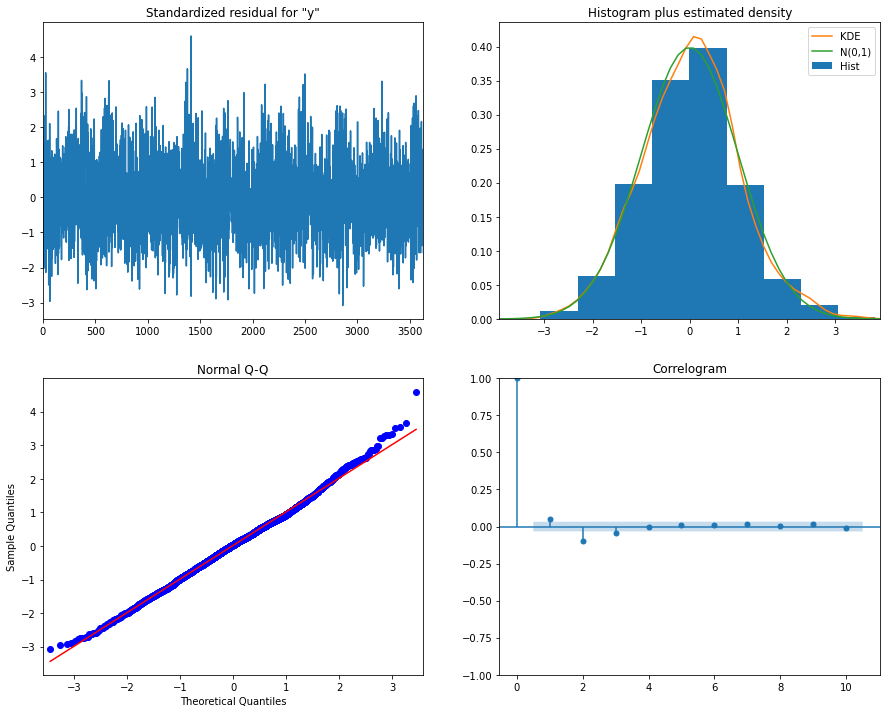

In [210]:
results.plot_diagnostics(figsize=(15,12))
plt.show()